Drawing Conclusions Using Query

In [14]:
# Load 'winequality_edited.csv,' a file you previously created
# in this workspace and worked with in the concepts
# "Appending Data(cont.)" and "Exploring with Visuals"

import pandas as pd

df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [2]:
# get the median amount of alcohol content
df.alcohol.median()

10.3

In [3]:
# select samples with alcohol content less than the median
low_alcohol = df.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [7]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

Do sweeter wines receive better ratings?

In [8]:
# get the median amount of residual sugar
df['residual_sugar'].median()

3.0

In [9]:
# select samples with residual sugar less than the median
low_sugar = df.query('residual_sugar < 3')

# select samples with residual sugar greater than or equal to the median
high_sugar = df.query('residual_sugar >= 3')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [10]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

Plotting with Matplotlib

Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

#1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [16]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

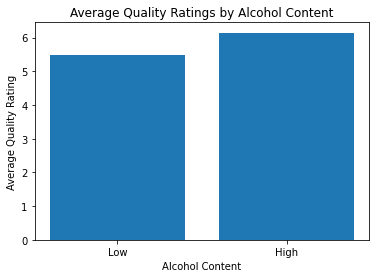

In [17]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

#2: Do sweeter wines receive higher ratings?

Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [18]:
# Use query to select each group and get its mean quality
sug_median = df['residual_sugar'].median()
low_sug = df.query('residual_sugar < {}'.format(sug_median))
high_sug = df.query('residual_sugar >= {}'.format(sug_median))

mean_sug_quality_low = low_sug['quality'].mean()
mean_sug_quality_high = high_sug['quality'].mean()

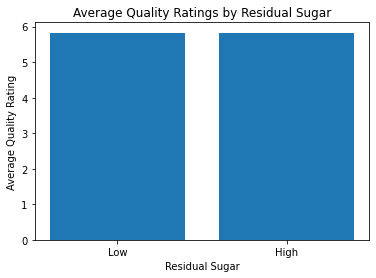

In [21]:
# Create a bar chart with proper labels
locations = [1,2]
heights = [mean_sug_quality_low, mean_sug_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

#3: What level of acidity receives the highest average rating?

Create a bar chart with a bar for each of the four acidity levels.

In [22]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [23]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [24]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [26]:
# Use groupby to get the mean quality for each acidity level
# Find the mean quality of each acidity level with groupby
df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64

In [31]:
mean_quality = df.groupby('acidity_levels').quality.mean()

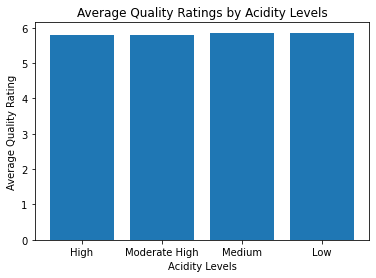

In [32]:
# Create a bar chart with proper labels
locations = [1,2,3,4]
heights = [mean_quality[0], mean_quality[3], mean_quality[2], mean_quality[1]]
labels = ['High', 'Moderate High', 'Medium', 'Low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Levels')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');